In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
gray_scale = 255
x_train / gray_scale
x_test / gray_scale

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


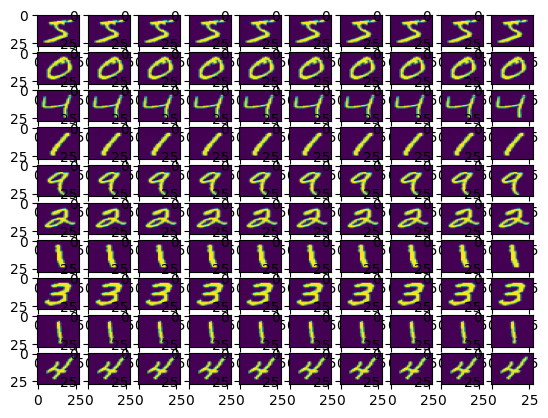

In [10]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), 
                    aspect='auto')
    k += 1
plt.show()

In [20]:
model = Sequential([
Flatten(input_shape=(28,28)),
Dense(256, activation='sigmoid'),
Dense(128, activation='sigmoid'),
Dense(10, activation='sigmoid'),
])

C:\Users\veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10,
batch_size=2000,
validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4904 - loss: 1.8877 - val_accuracy: 0.8321 - val_loss: 0.9538
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8378 - loss: 0.8342 - val_accuracy: 0.8941 - val_loss: 0.5031
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8910 - loss: 0.4852 - val_accuracy: 0.9104 - val_loss: 0.3612
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9097 - loss: 0.3612 - val_accuracy: 0.9215 - val_loss: 0.3008
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9196 - loss: 0.3037 - val_accuracy: 0.9273 - val_loss: 0.2683
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9285 - loss: 0.2667 - val_accuracy: 0.9330 - val_loss: 0.2456
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9359 - loss: 0.2374 - val_accuracy: 0.9391 - val_loss: 0.2262
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9403 - loss: 0.2193 - val_accuracy: 0.9421 - v

In [25]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.19664914906024933, 0.9440000057220459]
